In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
# Running logistic regression model
from sklearn.linear_model import LogisticRegression

### Read data

In [2]:
df = pd.read_csv("./telecom_churn_processed.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Many_service_calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0


### Let's convert all the categorical variables into dummy variables

In [3]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,1,0,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,1,0,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,1,0,1,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,1,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,1,1,0


<AxesSubplot: >

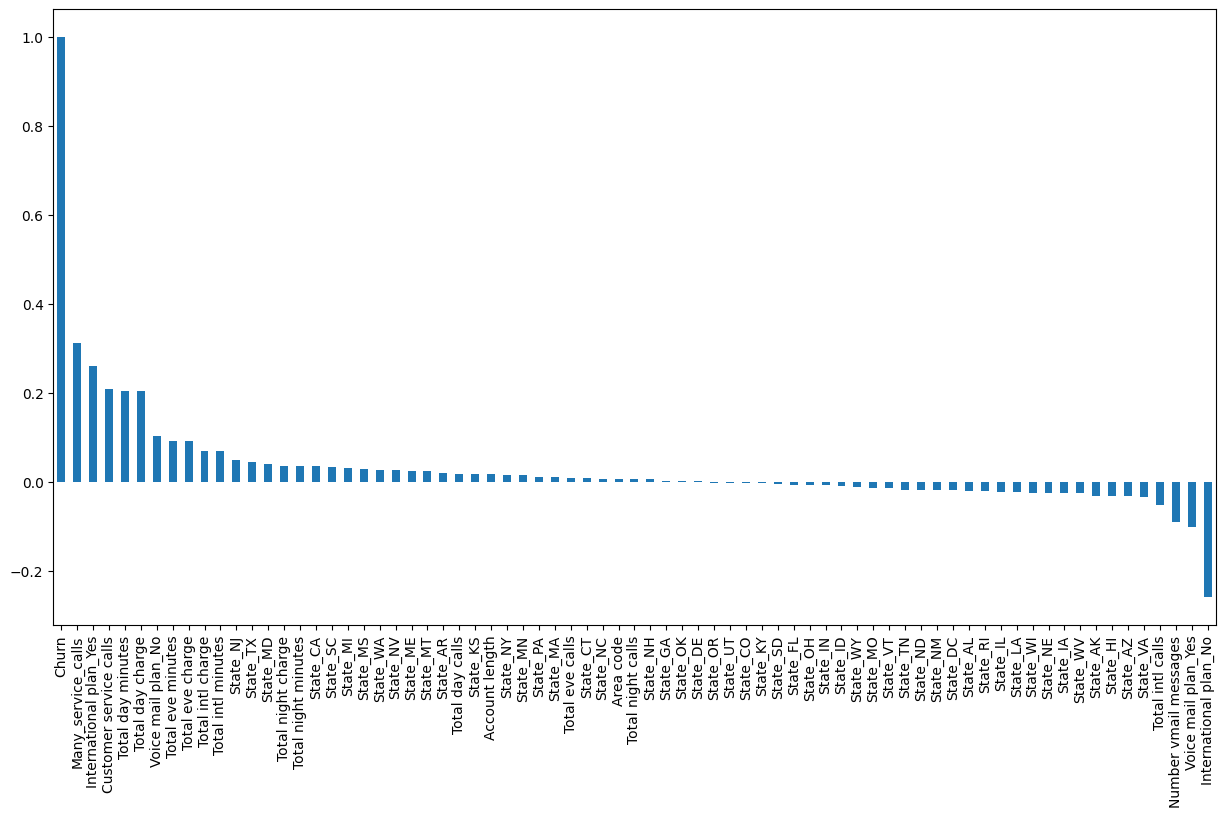

In [4]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

### Create Train & Test Data

In [5]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

#### Scaling data

In [6]:
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Train model

In [8]:
lgr_clf = LogisticRegression()
lgr_clf.fit(X_train, y_train)

LogisticRegression()

### Predict Test

In [9]:
y_pred = lgr_clf.predict(X_test)
y_score = lgr_clf.predict_proba(X_test)[:,1]

### Model Performance

Confusion Matrix - It tells us how many True Positive/True Negatives and False Positives/False Negatives are present in the prediction¶
a. TP: Number of customers who will actually default also predicted as default

b. TN: Number of customers who won't actually default also predicted as no default

c. FP: Number of customers who won't actually default but predicted as default

d. FN: Number of customers who will actually default but predicted as no default

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=lgr_clf.classes_)

In [11]:
# Accuracy
tp = conf_matrix[1,1]
fn = conf_matrix[1,0]
fp = conf_matrix[0,1]
tn = conf_matrix[0,0]
accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
accuracy

0.854

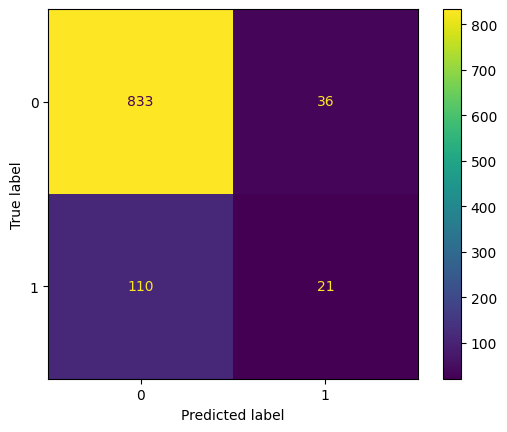

In [12]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=lgr_clf.classes_)
disp.plot()
plt.show()